In [1]:
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from scipy.stats import linregress

In [8]:
data_dir = Path("./grace_data/100/")
df_list = []
for run in data_dir.iterdir():
    datafiles = [f for f in run.iterdir() if "EM" in f.name]
    for csv in datafiles:
        data = pd.read_csv(csv, header = 2, index_col=0)
        df_list.append(data)

data = pd.concat(df_list).sort_index().groupby(level=0).agg("mean").sort_index().drop(index=[0])
std = pd.concat(df_list).sort_index().groupby(level=0).agg("std").sort_index().drop(index=[0])

temps = np.array(data.E_mean.keys())
chi = np.array(data.M_std**2)/temps
errs = 2*chi*np.array(std.M_std)/temps

In [3]:
def reduce(temp, tc):
    return np.abs((temp-tc)/tc)

In [4]:
def chi(temp, a, b, tc):
    return 

In [5]:
tc_idx = np.argmax(chi)

In [9]:
#plt.plot(np.log(reduce(temps[minidx:tc_idx])), x.slope*np.log(reduce(temps[minidx:tc_idx]))+x.intercept)
tc_min_idx = np.argmin((temps-2.20)**2)
padding = 3
maxidx = 50
residuals = []

for i in range(10):
    tc_idx = tc_min_idx + i
    tc_guess = temps[tc_idx]
    logrt = np.log(reduce(temps[tc_idx+padding : tc_idx + maxidx], tc_guess))
    x = linregress(logrt, np.log(chi[tc_idx+padding: tc_idx+maxidx]))
    res = np.sum([(e-o)**2 for e,o in zip(x.slope*logrt+x.intercept,np.log(chi[tc_idx+padding: tc_idx+maxidx]))])
    residuals.append(res)

print(np.argmin(residuals))

2


In [10]:
tc_idx = tc_min_idx + np.argmin(residuals)
tc_guess = temps[tc_idx]
logrt = np.log(reduce(temps[tc_idx+padding : tc_idx + maxidx], tc_guess))
x = linregress(logrt, np.log(chi[tc_idx+padding: tc_idx+maxidx]))

In [11]:
x.slope

-1.750617956581918

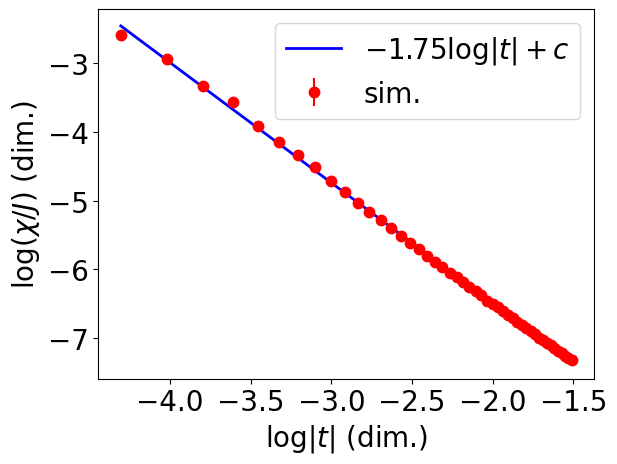

In [12]:
plt.errorbar(logrt, np.log(chi[tc_idx+padding: tc_idx+maxidx]), marker = ".", color = "r", linestyle = "None", markersize = 15, label = "sim.", yerr = errs[tc_idx+padding: tc_idx+maxidx])
plt.plot(logrt, x.slope*logrt+x.intercept, linewidth = 2, color = "b", label = r"${a}\log|t|+c$".format(a="%.2f"%x.slope))
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r"$\log|t|$ (dim.)", fontsize = 20)
plt.ylabel(r"$\log(\chi/J)$ (dim.)", fontsize = 20)

plt.savefig("./figures/chivst_logscale.png", dpi=200, bbox_inches = "tight")

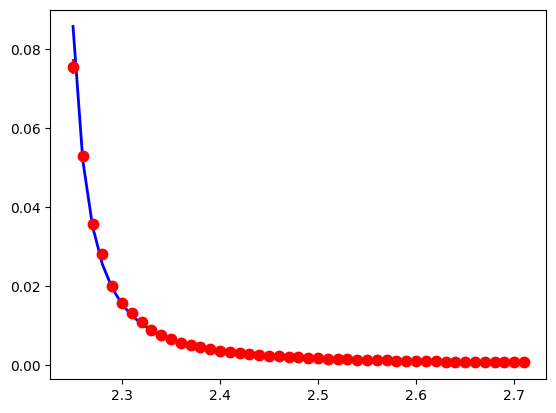

In [13]:
t = temps[tc_idx+padding : tc_idx + maxidx]
rt = reduce(temps[tc_idx+padding : tc_idx + maxidx], tc_guess)
logrt = np.log(rt)

plt.errorbar(t, chi[tc_idx+padding: tc_idx+maxidx], marker = ".", color = "r", linestyle = "None", markersize = 15, label = "sim.", yerr = errs[tc_idx+padding: tc_idx+maxidx])
plt.plot(t, np.exp(x.slope*logrt+x.intercept), linewidth = 2, color = "b", label = r"${a}\log|t|+c$".format(a="%.2f"%x.slope))

In [15]:
N=100

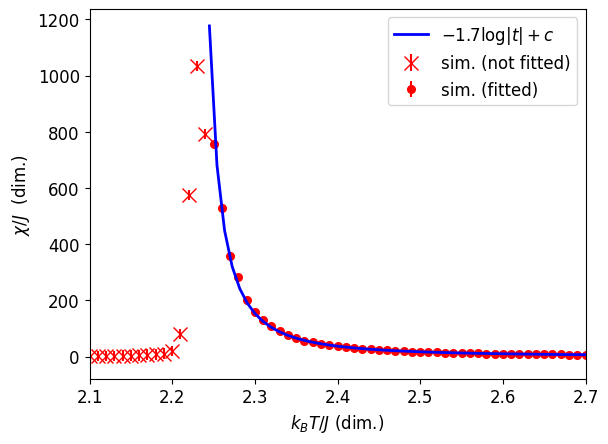

In [18]:
plt.errorbar(temps[:tc_idx+padding], N**2*chi[:tc_idx+padding], yerr = N**2*errs[tc_idx+padding], color = "r", marker = "x", linestyle = "None", markersize = 10, label = "sim. (not fitted)")
plt.errorbar(temps[tc_idx+padding: tc_idx+maxidx], N**2*chi[tc_idx + padding: tc_idx+maxidx], yerr = errs[tc_idx+padding: tc_idx+maxidx], color = "r", marker = ".", linestyle = "None", markersize = 11, label = "sim. (fitted)")

xax = np.linspace(tc_guess+.025, max(temps), 300)
plt.plot(xax, N**2*np.exp(x.intercept)*reduce(xax, tc_guess)**(-1.75), linewidth = 2, color = "b", label = r"${a}\log|t|+c$".format(a=-1.7), zorder = 20)
plt.legend(fontsize = 12)
plt.xlim([2.1,2.7])
plt.xlabel(r"$k_B T/J$ (dim.)", fontsize = 12)
plt.ylabel(r"$\chi/J$  (dim.)", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("./figures/chivst_unscaled.png", dpi=200, bbox_inches = "tight")

In [ ]:
plt.errorbar(temps[tc_idx+padding: tc_idx+maxidx], N**2*chi[tc_idx + padding: tc_idx+maxidx], yerr = errs[tc_idx+padding: tc_idx+maxidx], color = "r", marker = ".", linestyle = "None", markersize = 11, label = "sim. (fitted)")
plt.plot(xax, N**2*np.exp(x.intercept)*reduce(xax, tc_guess)**(-1.75), linewidth = 2, color = "b", label = r"${a}\log|t|+c$".format(a="%.2f"%x.slope), zorder = 20)

In [247]:
ttrmps = temps[tc_idx+padding: tc_idx+maxidx]
np.sum((ttrmps-np.exp(x.intercept*reduce(ttrmps, tc_guess)**(-1.75)))/errs[tc_idx+padding: tc_idx+maxidx]**2)/len(ttrmps)

29620549452354.266

In [156]:
x.slope

-1.750617956581918

In [181]:
x.interceptl

-9.990936197197964

In [249]:
x

LinregressResult(slope=-1.750617956581918, intercept=-9.990936197197964, rvalue=-0.9996976089026409, pvalue=4.545136175213859e-74, stderr=0.006419232898470948, intercept_stderr=0.015700216384264713)